1. Build a multimodal Gaussian distribution with synthetic data:

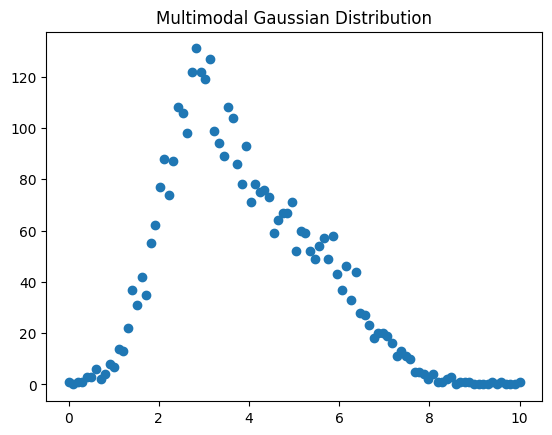

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.linspace(-5, 5, 500)
y1 = np.random.normal(-0.8, 0.5, 2000)
y2 = np.random.normal(0.5, 0.8, 2000)
y = np.concatenate([y1, y2])
hist, bin_edges = np.histogram(y, bins=100)

x = np.linspace(0, 10, 100)
y = hist
plt.scatter(x,y)
plt.title("Multimodal Gaussian Distribution")
plt.show()


2. Piecewise linear regression

Best split point is: 2.2222222222222223
Best total F-statistic is: 2.000071772012981
Linear time: 0.22427940368652344


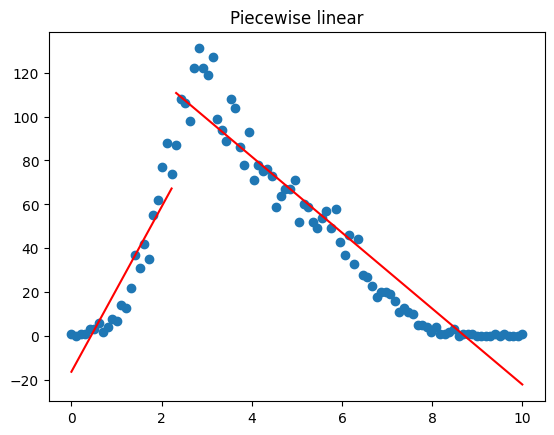

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy
import time

def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1)
    dfn = x.size-1
    dfd = y.size-1
    p = 1 - scipy.stats.f.cdf(f, dfn, dfd)
    return f, p


def compute_residuals(model, x, y):
    y_pred = model.predict(x)
    residuals = y - y_pred
    return residuals

best_split = None
best_total_f = np.inf

start_time = time.time()
for i in range(10, len(x)-10):
    x1, x2 = x[:i+1], x[i+1:]
    y1, y2 = y[:i+1], y[i+1:]


    model1 = LinearRegression().fit(np.array(x1).reshape(-1, 1), y1)
    model2 = LinearRegression().fit(np.array(x2).reshape(-1, 1), y2)


    residuals1 = compute_residuals(model1, np.array(x1).reshape(-1, 1), y1)
    residuals2 = compute_residuals(model2, np.array(x2).reshape(-1, 1), y2)


    f_value1, _ = f_test(residuals1, residuals2)
    f_value2, _ = f_test(residuals2, residuals1)

    total_f = f_value1 + f_value2


    if total_f < best_total_f:
        best_total_f = total_f
        best_split = i

end_time = time.time()
linear_regression_time = end_time - start_time

print("Best split point is:", x[best_split])
print("Best total F-statistic is:", best_total_f)
print("Linear time:", linear_regression_time)


x1, x2 = x[:best_split+1], x[best_split+1:]
y1, y2 = y[:best_split+1], y[best_split+1:]

line_model1 = LinearRegression().fit(np.array(x1).reshape(-1, 1), y1)
line_model2 = LinearRegression().fit(np.array(x2).reshape(-1, 1), y2)

y1_line_pred = line_model1.predict(np.array(x1).reshape(-1, 1))
y2_line_pred = line_model2.predict(np.array(x2).reshape(-1, 1))

plt.scatter(x,y)
plt.title("Piecewise linear")
plt.plot(x1, y1_line_pred, c='r')
plt.plot(x2, y2_line_pred, c='r')
plt.show()

2 splines and 1 knot

3. Piecewise polynomial regression

Best split point is: 2.6262626262626263
Best total F-statistic is: 2.0002740061332704
Poly time:  0.32801008224487305


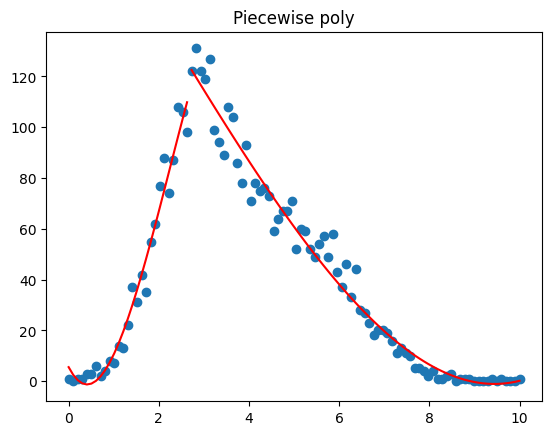

In [3]:
from sklearn.preprocessing import PolynomialFeatures

best_split = None
best_total_f = np.inf
degree = 3

def compute_residuals_poly(poly, model, x, y):
    y_pred = poly.transform(x)
    y_pred = model.predict(y_pred)
    residuals = y - y_pred
    return residuals

start_time = time.time()
for i in range(10, len(x)-10):
    x1, x2 = x[:i+1], x[i+1:]
    y1, y2 = y[:i+1], y[i+1:]

    poly = PolynomialFeatures(degree)
    X_poly1 = poly.fit_transform(np.array(x1).reshape(-1, 1))
    model1 =  LinearRegression().fit(X_poly1, y1)

    poly2 = PolynomialFeatures(degree)
    X_poly2 = poly2.fit_transform(np.array(x2).reshape(-1, 1))
    model2 =  LinearRegression().fit(X_poly2, y2)


    residuals1 = compute_residuals_poly(poly, model1, np.array(x1).reshape(-1, 1), y1)
    residuals2 = compute_residuals_poly(poly2, model2, np.array(x2).reshape(-1, 1), y2)


    f_value1, _ = f_test(residuals1, residuals2)
    f_value2, _ = f_test(residuals2, residuals1)

    total_f = f_value1 + f_value2


    if total_f < best_total_f:
        best_total_f = total_f
        best_split = i

end_time = time.time()
poly_regression_time = end_time - start_time

print("Best split point is:", x[best_split])
print("Best total F-statistic is:", best_total_f)
print("Poly time: ", poly_regression_time)



x1, x2 = x[:best_split+1], x[best_split+1:]
y1, y2 = y[:best_split+1], y[best_split+1:]


poly1 = PolynomialFeatures(degree)
X_poly1 = poly1.fit_transform(np.array(x1).reshape(-1, 1))
poly_model1 =  LinearRegression().fit(X_poly1, y1)

poly2 = PolynomialFeatures(degree)
X_poly2 = poly2.fit_transform(np.array(x2).reshape(-1, 1))
poly_model2 =  LinearRegression().fit(X_poly2, y2)


y1_pred = poly1.transform(np.array(x1).reshape(-1, 1))
y1_poly_pred = poly_model1.predict(y1_pred)
y2_pred = poly2.transform(np.array(x2).reshape(-1, 1))
y2_poly_pred = poly_model2.predict(y2_pred)

plt.scatter(x,y)
plt.title("Piecewise poly")
plt.plot(x1, y1_poly_pred, c='r')
plt.plot(x2, y2_poly_pred, c='r')
plt.show()

2 splines and 1 knot

4. Evaluation Metrics:

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(predictions, true_values):
    rsme = np.sqrt(mean_squared_error(true_values, predictions))
    r2 = r2_score(true_values, predictions)
    return rsme, r2


y_line = np.concatenate([y1_line_pred, y2_line_pred])
print("line result (rsme, r2) =", evaluate_model(y_line, y))

y_poly = np.concatenate([y1_poly_pred, y2_poly_pred])
print("poly result (rsme, r2) =", evaluate_model(y_poly, y))


line result (rsme, r2) = (11.353969755176477, 0.9139814039198603)
poly result (rsme, r2) = (6.212627737142075, 0.9742458306751984)


5. Polynomial regression:

poly_time 0.004410982131958008


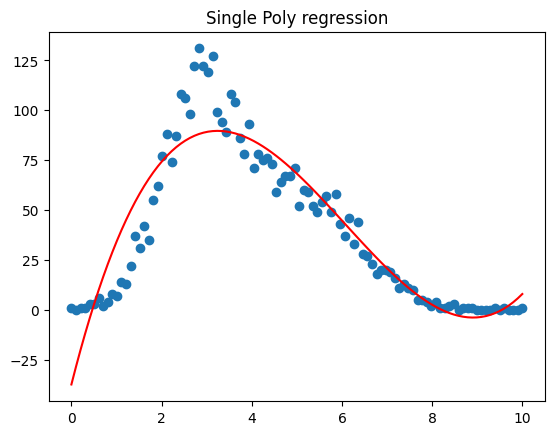

In [5]:
start_time = time.time()
p = np.polyfit(x, y, deg=3)
end_time = time.time()
poly_single_regression_time = end_time - start_time
print("poly_time", poly_single_regression_time)

y_pred = np.polyval(p, x)
plt.scatter(x,y)
plt.title("Single Poly regression")
plt.plot(x, y_pred, c= 'r')
plt.show()

6. Measure and report the execution time:

In [6]:
linear_regression_time, poly_regression_time, poly_single_regression_time


(0.22427940368652344, 0.32801008224487305, 0.004410982131958008)

7. Ridge, LASSO, and comparison:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.78722e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.035e+04, tolerance: 1.499e+01
  model = cd_fast.enet_coordinate_descent(


MSE Linear: 66.27962267540664
MSE Ridge: 76.87179334730598
MSE Lasso: 189.77364808792368

Number of parameters:
Linear: 9
Ridge: 9
Lasso: 9

Coefficients:
Linear: ['0.000', '-44.924', '30.390', '38.824', '-29.744', '8.073', '-1.074', '0.071', '-0.002']
Ridge: ['0.000', '-7.629', '17.968', '25.675', '-19.606', '5.246', '-0.686', '0.044', '-0.001']
Lasso: ['0.000', '74.570', '-11.980', '-0.043', '0.034', '0.003', '0.000', '-0.000', '-0.000']


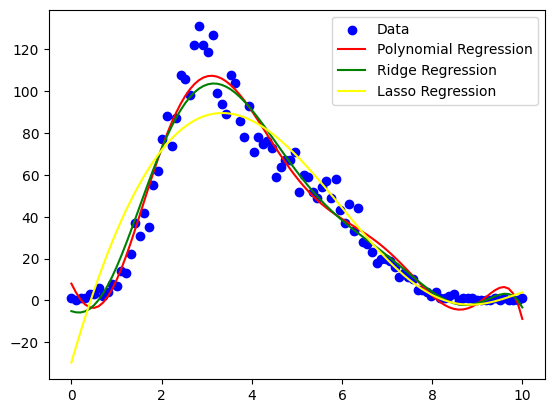

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error



degree = 8
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(x.reshape(-1, 1))


linear_model = LinearRegression().fit(X_poly, y)
ridge_model = Ridge(alpha=1.0).fit(X_poly, y)
lasso_model = Lasso(alpha=0.1).fit(X_poly, y)


y_pred_linear = linear_model.predict(X_poly)
y_pred_ridge = ridge_model.predict(X_poly)
y_pred_lasso = lasso_model.predict(X_poly)


mse_linear = mean_squared_error(y, y_pred_linear)
mse_ridge = mean_squared_error(y, y_pred_ridge)
mse_lasso = mean_squared_error(y, y_pred_lasso)

print(f"MSE Linear: {mse_linear}")
print(f"MSE Ridge: {mse_ridge}")
print(f"MSE Lasso: {mse_lasso}")


print("\nNumber of parameters:")
print(f"Linear: {linear_model.coef_.shape[0]}")
print(f"Ridge: {ridge_model.coef_.shape[0]}")
print(f"Lasso: {lasso_model.coef_.shape[0]}")


print("\nCoefficients:")
formatted_coefs = [f"{coef:.3f}" for coef in linear_model.coef_]
print(f"Linear: {formatted_coefs}")
formatted_coefs = [f"{coef:.3f}" for coef in ridge_model.coef_]
print(f"Ridge: {formatted_coefs}")
formatted_coefs = [f"{coef:.3f}" for coef in lasso_model.coef_]
print(f"Lasso: {formatted_coefs}")


plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred_linear, color='red', label='Polynomial Regression')
plt.plot(x, y_pred_ridge, color='green', label='Ridge Regression')
plt.plot(x, y_pred_lasso, color='yellow', label='Lasso Regression')
plt.legend()
plt.show()

For the accuracy, Ridge is the better.
For the number of parameters, Ridge has 8 and Lasso has 5.
For parameters coefficient, Ridge shrinks the parameters but not remove them. However, Lasso can removes parameters and increase values of other parameters.